## Book Recommendation System

### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings

from keras.layers import Input, Embedding, Flatten, Dot, Dense
from keras.models import Model

warnings.filterwarnings('ignore')
%matplotlib inline

Using TensorFlow backend.


<a id="1"></a> 
## Loading in data

In [2]:
dataset = pd.read_csv('../input/ratings.csv')

In [3]:
dataset.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [4]:
dataset.shape

(981756, 3)

In [5]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2, random_state=42)

In [6]:
train.head()

,book_id,user_id,rating
341848,3423,4608,2
964349,9811,36373,5
645459,6485,2957,4
74960,750,42400,3
358670,3591,36886,5


In [7]:
test.head()

,book_id,user_id,rating
646451,6495,19643,5
614851,6175,8563,4
974393,9920,52110,3
21471,215,33864,5
272540,2728,16587,3


In [8]:
n_users = len(dataset.user_id.unique())
n_users

53424

In [9]:
n_books = len(dataset.book_id.unique())
n_books

10000

<a id="2"></a> 
## Creating dot product model
Most recommendation systems are build using a simple dot product as shown below but newer ones are now implementing a neural network instead of the simple dot product.

In [10]:
# creating book embedding path
book_input = Input(shape=[1], name="Book-Input")
book_embedding = Embedding(n_books+1, 5, name="Book-Embedding")(book_input)
book_vec = Flatten(name="Flatten-Books")(book_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# performing dot product and creating model
prod = Dot(name="Dot-Product", axes=1)([book_vec, user_vec])
model = Model([user_input, book_input], prod)
model.compile('adam', 'mean_squared_error')

In [11]:
from keras.models import load_model

if os.path.exists('regression_model.h5'):
    model = load_model('regression_model.h5')
else:
    history = model.fit([train.user_id, train.book_id], train.rating, epochs=5, verbose=1)
    model.save('regression_model.h5')
    plt.plot(history.history['loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Training Error")

Epoch 1/5
785404/785404 [==============================] - 91s 116us/step - loss: 13.6703
Epoch 2/5
785404/785404 [==============================] - 91s 116us/step - loss: 4.6083
Epoch 3/5
785404/785404 [==============================] - 89s 114us/step - loss: 1.8285
Epoch 4/5
545920/785404 [===================>..........] - ETA: 27s - loss: 1.2371

In [12]:
model.evaluate([test.user_id, test.book_id], test.rating)

196352/196352 [==============================] - 9s 44us/step


1.1831563937112282

In [13]:
predictions = model.predict([test.user_id.head(10), test.book_id.head(10)])

[print(predictions[i], test.rating.iloc[i]) for i in range(0,10)]

[4.8419847] 5
[3.517901] 4
[3.3181684] 3
[4.3749285] 5
[3.575142] 3
[3.3783646] 3
[4.1194663] 3
[4.6386833] 4
[4.199691] 3
[3.669234] 5


[None, None, None, None, None, None, None, None, None, None]

<a id="3"></a> 
## Creating Neural Network
Neural Networks proved there effectivness for almost every machine learning problem as of now and they also perform exceptionally well for recommendation systems.

In [14]:
from keras.layers import Concatenate

# creating book embedding path
book_input = Input(shape=[1], name="Book-Input")
book_embedding = Embedding(n_books+1, 5, name="Book-Embedding")(book_input)
book_vec = Flatten(name="Flatten-Books")(book_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# concatenate features
conc = Concatenate()([book_vec, user_vec])

# add fully-connected-layers
fc1 = Dense(128, activation='relu')(conc)
fc2 = Dense(32, activation='relu')(fc1)
out = Dense(1)(fc2)

# Create model and compile it
model2 = Model([user_input, book_input], out)
model2.compile('adam', 'mean_squared_error')

Epoch 1/5
785404/785404 [==============================] - 121s 154us/step - loss: 0.7976
Epoch 2/5
785404/785404 [==============================] - 121s 154us/step - loss: 0.6884
Epoch 3/5
785404/785404 [==============================] - 121s 154us/step - loss: 0.6583
Epoch 4/5
785404/785404 [==============================] - 120s 153us/step - loss: 0.6355
Epoch 5/5
785404/785404 [==============================] - 121s 154us/step - loss: 0.6175


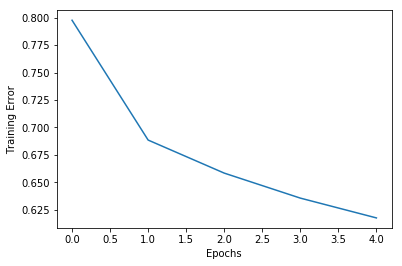

In [15]:
from keras.models import load_model

if os.path.exists('regression_model2.h5'):
    model2 = load_model('regression_model2.h5')
else:
    history = model2.fit([train.user_id, train.book_id], train.rating, epochs=5, verbose=1)
    model2.save('regression_model2.h5')
    plt.plot(history.history['loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Training Error")

In [16]:
model2.evaluate([test.user_id, test.book_id], test.rating)

196352/196352 [==============================] - 9s 47us/step


0.7121146619344201

In [17]:
predictions = model2.predict([test.user_id.head(10), test.book_id.head(10)])

[print(predictions[i], test.rating.iloc[i]) for i in range(0,10)]

[4.8688126] 5
[3.880355] 4
[3.5202458] 3
[4.3751984] 5
[3.455806] 3
[4.018049] 3
[3.7592967] 3
[4.79464] 4
[4.2242594] 3
[4.1765265] 5


[None, None, None, None, None, None, None, None, None, None]

<a id="4"></a> 
## Visualizing Embeddings
Embeddings are weights that are learned to represent some specific variable like books and user in our case and therefore we can not only use them to get good results on our problem but also to extract inside about our data.

In [18]:
# Extract embeddings
book_em = model.get_layer('Book-Embedding')
book_em_weights = book_em.get_weights()[0]

In [19]:
book_em_weights[:5]

array([[ 0.00427877,  0.0264524 ,  0.04341337,  0.0324815 ,  0.01552917],
       [-1.3258268 ,  1.1180487 ,  1.2289333 ,  1.3392195 ,  1.4862667 ],
       [-1.3289323 ,  1.2933611 ,  1.2898988 ,  1.228918  ,  1.2902678 ],
       [-1.1735787 ,  0.5929433 ,  1.1071193 ,  0.8967678 ,  0.89680403],
       [-1.3172864 ,  1.4247298 ,  1.340851  ,  1.1860664 ,  1.2676706 ]],
      dtype=float32)

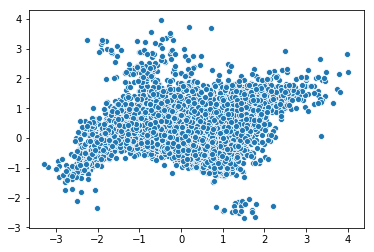

In [20]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
pca_result = pca.fit_transform(book_em_weights)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])

In [21]:
book_em_weights = book_em_weights / np.linalg.norm(book_em_weights, axis = 1).reshape((-1, 1))
book_em_weights[0][:10]
np.sum(np.square(book_em_weights[0]))

1.0000001

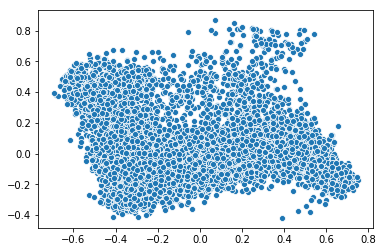

In [22]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(book_em_weights)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])

In [23]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tnse_results = tsne.fit_transform(book_em_weights)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10001 samples in 0.005s...
[t-SNE] Computed neighbors for 10001 samples in 0.570s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10001
[t-SNE] Computed conditional probabilities for sample 2000 / 10001
[t-SNE] Computed conditional probabilities for sample 3000 / 10001
[t-SNE] Computed conditional probabilities for sample 4000 / 10001
[t-SNE] Computed conditional probabilities for sample 5000 / 10001
[t-SNE] Computed conditional probabilities for sample 6000 / 10001
[t-SNE] Computed conditional probabilities for sample 7000 / 10001
[t-SNE] Computed conditional probabilities for sample 8000 / 10001
[t-SNE] Computed conditional probabilities for sample 9000 / 10001
[t-SNE] Computed conditional probabilities for sample 10000 / 10001
[t-SNE] Computed conditional probabilities for sample 10001 / 10001
[t-SNE] Mean sigma: 0.034742
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.480858
[t-SNE] KL

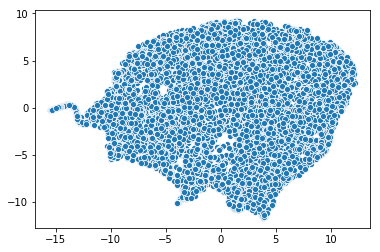

In [24]:
sns.scatterplot(x=tnse_results[:,0], y=tnse_results[:,1])

<a id="5"></a> 
## Making Recommendations

In [25]:
# Creating dataset for making recommendations for the first user
book_data = np.array(list(set(dataset.book_id)))
book_data[:5]

array([1, 2, 3, 4, 5])

In [26]:
user = np.array([1 for i in range(len(book_data))])
user[:5]

array([1, 1, 1, 1, 1])

In [27]:
predictions = model.predict([user, book_data])

predictions = np.array([a[0] for a in predictions])

recommended_book_ids = (-predictions).argsort()[:5]

recommended_book_ids

array([8998, 7152, 9872, 5724, 9318])

In [28]:
# print predicted scores
predictions[recommended_book_ids]

array([3.9778192, 3.9610815, 3.9294424, 3.9002035, 3.8938763],
      dtype=float32)

In [29]:
books = pd.read_csv('../input/books.csv')
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [30]:
books[books['id'].isin(recommended_book_ids)]

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
5723,5724,7124475,7124475,13036225,9,1442406593,9.781442e+12,Jennifer Echols,2010.0,Endless Summer,"Endless Summer (The Boys Next Door, #1-2)",eng,4.02,18438,18642,648,417,1223,3860,5275,7867,https://images.gr-assets.com/books/1276962830m...,https://images.gr-assets.com/books/1276962830s...
7151,7152,625554,20178265,611921,8,159038363X,9.781590e+12,Gerald N. Lund,1994.0,"The Work and the Glory, Vol. 1: Pillar of Light","Pillar of Light (The Work and the Glory, #1)",NaN,4.28,12722,14255,894,117,337,1951,4949,6901,https://images.gr-assets.com/books/1416338631m...,https://images.gr-assets.com/books/1416338631s...
8997,8998,292740,292740,2457130,37,2266071289,9.782266e+12,Lorenzo Carcaterra,1995.0,Sleepers,Sleepers,eng,4.18,9560,10772,553,73,304,1775,4088,4532,https://images.gr-assets.com/books/1327871596m...,https://images.gr-assets.com/books/1327871596s...
9317,9318,359461,359461,349583,17,1414310579,9.781414e+12,Dee Henderson,2001.0,The Guardian,The Guardian (O'Malley #2),eng,4.40,11474,12163,348,34,165,1423,3762,6779,https://images.gr-assets.com/books/1406514522m...,https://images.gr-assets.com/books/1406514522s...
9871,9872,24480276,24480276,44074400,45,NaN,9.781475e+12,Laura Barnett,2015.0,The Versions of Us,The Versions of Us,eng,3.57,8477,11346,1685,382,1170,3457,4250,2087,https://images.gr-assets.com/books/1423155390m...,https://images.gr-assets.com/books/1423155390s...
